<a href="https://colab.research.google.com/github/bhoomika297/MACHINE_LEARNING_PROJECTS/blob/main/MBA_class_2025_admit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mba-admission-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5719862%2F9425404%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240927%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240927T115208Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D04834472a0d13426626be93e23f9d032782a07b5ee7bf026cd2cf6ddf713342d8296b9d3a3075b9a35645d604e83884677591603b7bedcd8af29aa92b93ca2943327020284a15e87c22692d1335a4e9fa7b978d7ad038c053625a57cb66ab7dade936ef760186eb3cc07427ec801ae5fa5bc8c2d67205749e41b682edee168e4ab57eb161b1137d1652631702753d34be860b521707a180ff2935f88d29f149765fca4629ad75234341a9c5ca23c5776941663393719d7510a62efb25ebb54d5fb33e3e7035674f6309721681e7a7d1f520095fa11c42aaf88c2fe217511d618eb142866cf0ba286b79590267cd5ed841b86feee93c8890d5854d66d981a840e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mba-admission-dataset/MBA.csv


In [ ]:
df = pd.read_csv('/kaggle/input/mba-admission-dataset/MBA.csv')

In [ ]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [ ]:
df.drop('application_id',axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           4352 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


In [ ]:
df.isnull().sum()

gender              0
international       0
gpa                 0
major               0
race             1842
gmat                0
work_exp            0
work_industry       0
admission        5194
dtype: int64

In [ ]:
df.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [ ]:
df.shape

(6194, 9)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

gender
Male      3943
Female    2251
Name: count, dtype: int64


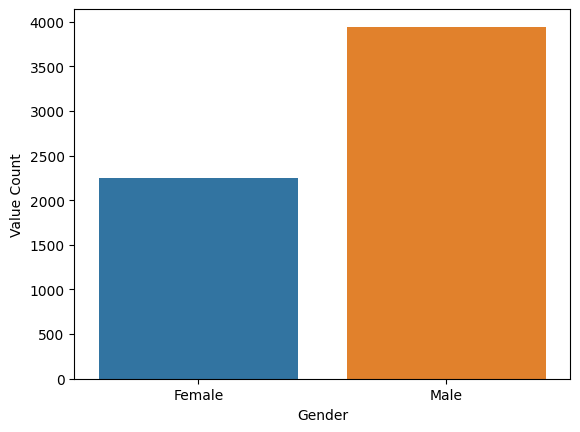

In [ ]:
X= df['gender'].value_counts()


sns.countplot(x='gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Value Count')
print(X)

race
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


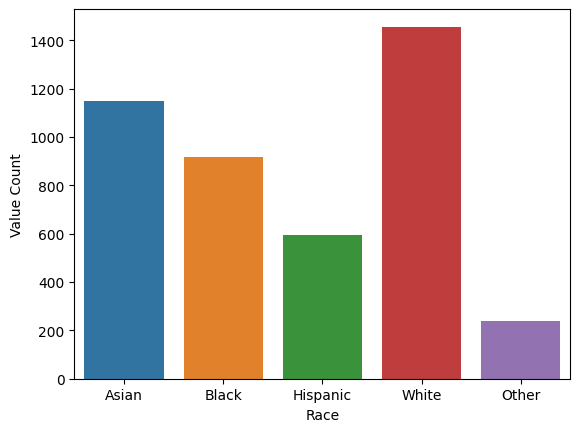

In [ ]:
sns.countplot(x='race',data=df)
plt.xlabel('Race')
plt.ylabel('Value Count')
print(df['race'].value_counts())

major
Humanities    2481
STEM          1875
Business      1838
Name: count, dtype: int64


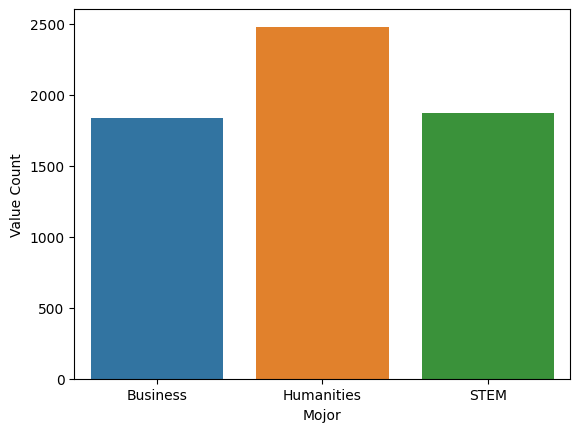

In [ ]:
sns.countplot(x='major',data=df)
plt.xlabel('Mojor')
plt.ylabel('Value Count')
print(df['major'].value_counts())

In [ ]:
df[df['race'].isnull()==True]

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
7,Male,True,3.02,Business,NaN,630.0,6.0,Financial Services,NaN
11,Male,True,2.85,Humanities,NaN,580.0,4.0,PE/VC,NaN
15,Female,True,3.05,Humanities,NaN,710.0,4.0,Consulting,Admit
19,Male,True,3.09,Business,NaN,670.0,8.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...
6167,Male,True,3.24,Business,NaN,570.0,4.0,Consulting,NaN
6176,Female,True,3.29,Business,NaN,640.0,5.0,Technology,NaN
6186,Male,True,3.23,Humanities,NaN,610.0,7.0,Financial Services,NaN
6191,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit


work_industry
Consulting               1619
PE/VC                     907
Technology                716
Nonprofit/Gov             651
Investment Banking        580
Financial Services        451
Other                     421
Health Care               334
Investment Management     166
CPG                       114
Name: count, dtype: int64


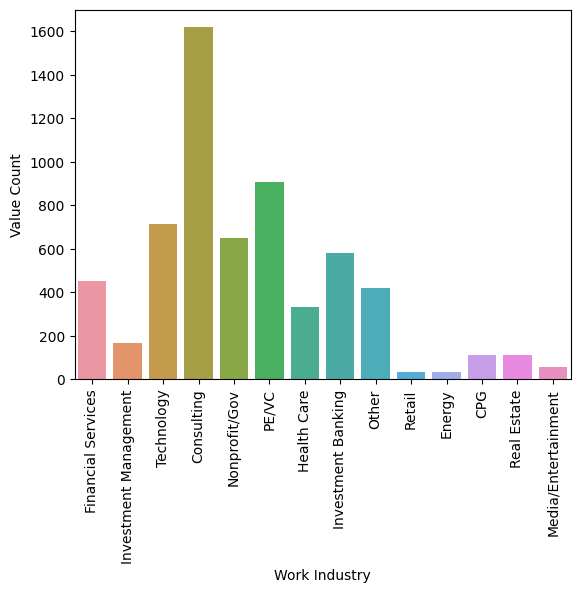

In [ ]:
sns.countplot(x='work_industry',data=df)
plt.xlabel('Work Industry')
plt.ylabel('Value Count')
plt.xticks(rotation=90)
print(df['work_industry'].value_counts().head(10))

admission
Admit       900
Waitlist    100
Name: count, dtype: int64


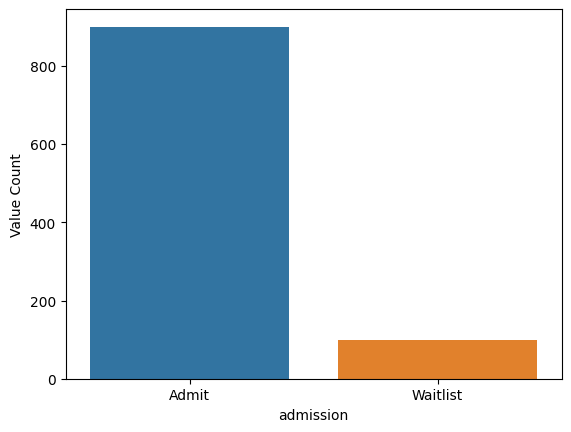

In [ ]:
sns.countplot(x='admission',data=df)
plt.xlabel('admission')
plt.ylabel('Value Count')
print(df['admission'].value_counts())

<Axes: >

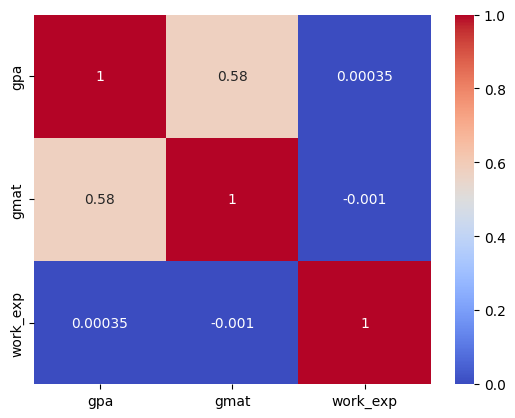

In [ ]:
data = df.drop('admission',axis=1)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

corr = numeric_data.corr()

sns.heatmap(corr,annot=True,cmap='coolwarm')

# **Numerical Embedding of Categorical Data**

In [ ]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [ ]:
df['admission']  = df['admission'].map({'Admit':1,'Waitlist':0}).fillna(0)

In [ ]:
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,False,3.30,Business,Asian,620.0,3.0,Financial Services,1.0
1,1,False,3.28,Humanities,Black,680.0,5.0,Investment Management,0.0
2,0,True,3.30,Business,NaN,710.0,5.0,Technology,1.0
3,1,False,3.47,STEM,Black,690.0,6.0,Technology,0.0
4,1,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,0.0


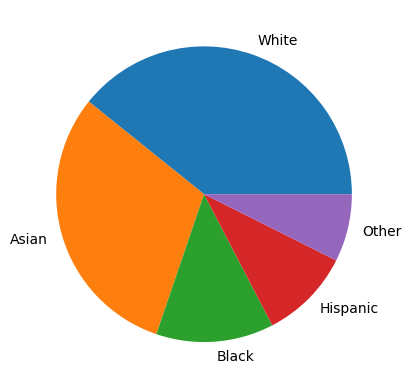

In [ ]:
race = df[df['admission'] == 1]['race']

plt.pie(race.value_counts(),labels=race.value_counts().index)
plt.show()

In [ ]:
X = df.drop('admission',axis=1)
X = pd.get_dummies(X,drop_first=True)
Y = df['admission']

In [ ]:
X.head()

,gender,international,gpa,gmat,work_exp,major_Humanities,major_STEM,race_Black,race_Hispanic,race_Other,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,0,False,3.30,620.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,3.28,680.0,5.0,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,True,3.30,710.0,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,False,3.47,690.0,6.0,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,False,3.35,590.0,5.0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
y_train.head()

6189    0.0
711     1.0
3954    1.0
1020    1.0
5726    0.0
Name: admission, dtype: float64

In [ ]:
LRmodel = LogisticRegression()

In [ ]:
LRmodel.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
LR_predict = LRmodel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,LR_predict)

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 84.10%


In [ ]:
print(classification_report(y_test,LR_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      1043
         1.0       0.47      0.04      0.07       196

    accuracy                           0.84      1239
   macro avg       0.66      0.51      0.49      1239
weighted avg       0.79      0.84      0.78      1239



In [ ]:
SVC_model = SVC()

SVC_model.fit(X_train,y_train)
SVC_predict = SVC_model.predict(X_test)

accuracy = accuracy_score(y_test,SVC_predict)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 84.18%


In [ ]:
KNC_model = KNeighborsClassifier()

KNC_model.fit(X_train,y_train)
KNC_predict = KNC_model.predict(X_test)

accuracy = accuracy_score(y_test,KNC_predict)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 83.05%


In [ ]:
print(classification_report(y_test,KNC_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1043
         1.0       0.42      0.18      0.26       196

    accuracy                           0.83      1239
   macro avg       0.64      0.57      0.58      1239
weighted avg       0.79      0.83      0.80      1239



In [ ]:
print(confusion_matrix(y_test,KNC_predict))

[[993  50]
 [160  36]]


In [ ]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train,y_train)

DTC_predict = DTC_model.predict(X_test)

accuracy = accuracy_score(y_test,DTC_predict)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 79.98%


In [ ]:
RFC_model =  RandomForestClassifier()
RFC_model.fit(X_train,y_train)

predict = RFC_model.predict(X_test)

accuracy = accuracy_score(y_test,predict)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 83.21%
